<a href="https://colab.research.google.com/github/Jonnytan555/ML_for_Finance/blob/main/Portfolio_Optimisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://medium.com/@randerson112358/python-for-finance-portfolio-optimization-66882498847?fbclid=IwAR0YJAd0_iEKaYLHXZMzZJ2x6zdmlgJSawPwTiYCCLEP1BZar1kNbz8DlHQ
#https://pyportfolioopt.readthedocs.io/en/latest/
#import libaries

from datetime import datetime 
import numpy as np 
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#List stock Names

stockSymbols = ["FB","AMZN","AAPL","NFLX","GOOG"]

In [ ]:
#Assign weights to stocks

weights = np.array([0.2,0.2,0.2,0.2,0.2]) 

In [ ]:
#Set and start and end date
stocksStartDate = '2013-01-01'
today = datetime.today().strftime("%Y-%m-%d")

print(today)

2020-09-18


In [ ]:
#get adjusted close stock prices 

def getmyPortfolio(stocks=stockSymbols,start=stocksStartDate,end=today,col='Adj Close'):
    data = web.DataReader(stocks,data_source='yahoo',start=start,end=end)[col]
    return data 

In [ ]:
my_stocks = getmyPortfolio(stockSymbols)
my_stocks

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,28.000000,257.309998,17.094694,13.144286,360.274597
2013-01-03,27.770000,258.480011,16.878920,13.798572,360.483826
2013-01-04,28.760000,259.149994,16.408764,13.711429,367.607117
2013-01-07,29.420000,268.459991,16.312239,14.171429,366.003143
2013-01-08,29.059999,266.380005,16.356150,13.880000,365.280823
...,...,...,...,...,...
2020-09-14,266.149994,3102.969971,115.360001,476.260010,1519.280029
2020-09-15,272.420013,3156.129883,115.540001,495.989990,1541.439941
2020-09-16,263.519989,3078.100098,112.129997,483.859985,1520.900024


In [ ]:
def showGraph(stocks=stockSymbols, start=stocksStartDate, end=today, col ='Adj Close'):
    
    #Create title
    title = 'Portfolio '+col+' Price History'
    
    #Get Portfolio info
    
    my_stocks = getmyPortfolio(stocks = stocks, start=start, end=end, col=col)
    
    #Plot the initial base graph setup
    
    plt.figure(figsize=(15,7))
    
    #loop through each of your Stocks and plot the results
    
    for c in my_stocks.columns.values:
        plt.plot(my_stocks[c],label=c)
        
    plt.title(title)
    plt.xlabel('Date', fontsize = 18)
    plt.ylabel(col+' Price USD ($)', fontsize=18)
    plt.legend(my_stocks.columns.values, loc='upper left')
    plt.show()
    

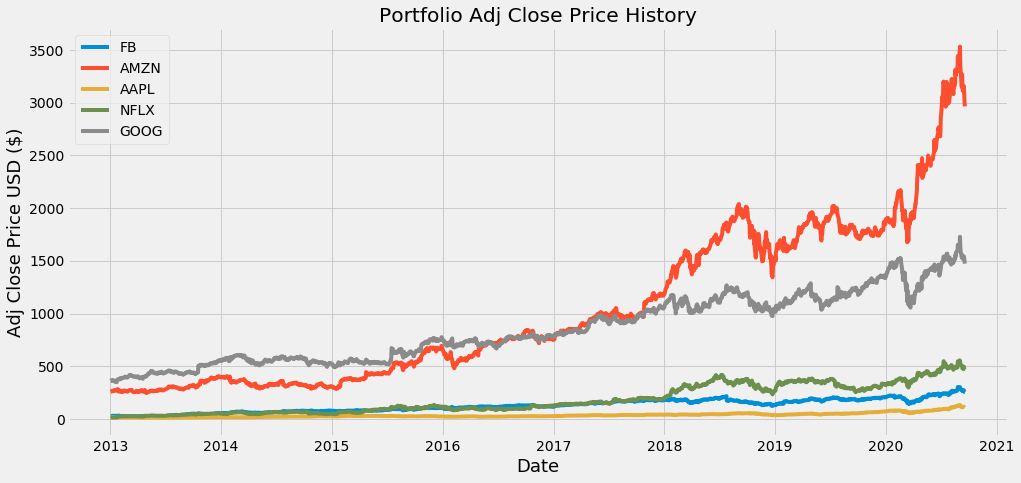

In [ ]:
showGraph(stockSymbols)

In [ ]:
#show the daily simple return
returns = my_stocks.pct_change()
returns

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.008214,0.004547,-0.012622,0.049777,0.000581
2013-01-04,0.035650,0.002592,-0.027855,-0.006315,0.019760
2013-01-07,0.022949,0.035925,-0.005883,0.033549,-0.004363
2013-01-08,-0.012237,-0.007748,0.002692,-0.020565,-0.001974
...,...,...,...,...,...
2020-09-14,-0.001725,-0.004252,0.030000,-0.011970,-0.000947
2020-09-15,0.023558,0.017132,0.001560,0.041427,0.014586
2020-09-16,-0.032670,-0.024723,-0.029514,-0.024456,-0.013325


In [ ]:
#create and show the annualized covariance matrix
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Symbols,,,,,
FB,0.118124,0.053559,0.043239,0.056432,0.049598
AMZN,0.053559,0.093179,0.037898,0.062538,0.047472
AAPL,0.043239,0.037898,0.080190,0.033648,0.038067
NFLX,0.056432,0.062538,0.033648,0.212791,0.049758
GOOG,0.049598,0.047472,0.038067,0.049758,0.065494


In [ ]:
#calculate the portfolio varaiance 
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual,weights))
port_variance

0.06056777860914923

In [ ]:
# Calculate the portfolio volatility aka standard Deviation 
port_volatility = np.sqrt(port_variance)
port_volatility

0.24610521857357928

In [ ]:
#Calculate the annual portfolio return
portfolioSimpleAnnualReturn = np.sum(returns.mean() * weights) *252
portfolioSimpleAnnualReturn

0.35399321754819124

In [ ]:
#Show the expected annual return, volatility (risk), and variance

percent_variance = str(round(port_variance, 2)*100) +'%'
percent_volatility = str(round(port_volatility, 2) * 100 ) + '%'
percent_return = str(round(portfolioSimpleAnnualReturn, 2) * 100 ) + '%'

print('Expected annual return: '+ percent_return)
print('Annual volatility / risk: '+ percent_volatility )
print('Annual Variance: '+ percent_variance)

Expected annual return: 35.0%
Annual volatility / risk: 25.0%
Annual Variance: 6.0%


In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

ModuleNotFoundError: No module named 'pypfopt'

In [ ]:
#Portfolio Optimization !

#Calcualte the expected returns and the annualised sample caovariance matrix of asset returns
mu = expected_returns.mean_historical_return(my_stocks)
S = risk.models.sample_cov()

#optimize for max sharpe ratio (a way to describe how much excess return you receive for some amount of volatility)
#measures the performance of an investment compared to an investment that is risk free (such as bonds or treasury deals)

#optimize for max sharpe ratio
ef - efficientFrontier(mu, S)
weights = ef.max_sharpe()

#cleaning 
cleaned_weights = ef.clean_weights() #helper method to clean raw weights. 
                                    #Sets weights that absolute value below some cut off value. 
                                    #Once it changes those values to zero, it the round the rest of the values
print(cleaned_weights)
ef.portfolio_performance(verbose = True)


NameError: name 'expected_returns' is not defined

In [ ]:
#Get discrete allocation of each share per stock
from pyfopt.discrete_allocation import DiscreteAllocatio, get_latest_prices

latest = get_latest_prices(my_stocks)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 15000)

allocation , leftover = da.lp_portfolio()
print('Discrete allocation:', allocation)
print('Funds remaining: ${:.2f'}.format(leftover)')

SyntaxError: invalid syntax (<ipython-input-18-74b89e0e3000>, line 10)